#### Imports...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import warnings
warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv (r'../europe.csv')
df.head(3)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.8,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.3,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [4]:
#Estandarizo los datos
df_countries= df["Country"]
df_stand=  StandardScaler().fit_transform(df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]])
df_stand= pd.DataFrame(df_stand, columns=df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].columns)
df_stand.head(3)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973


### Variables

In [11]:
k = 3
n = 7
radius = 6
learning_rate = 0.9

In [60]:
#example
weights = [[i+j*k for i in range(k)] for j in range(k)]
#starts weights with values from 0 to k*k, like this:
#[[0, 1, 2],
# [3, 4, 5],
# [6, 7, 8]]

weights

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

```reloading our functions...```

In [6]:
%load_ext autoreload

In [7]:
%autoreload 2


what are neighbors?

In [46]:
from utils import get_avg_distance, get_neighbors_avg_dst, get_neighbors
test_mat = [ [[0, 0],[0,1],[0,2],[0,3]],[[1,0],[1,1],[1,2],[1,3]],[[2,0],[2,1],[2,2],[2,3]], [[3,0],[3,1],[3,2],[3,3]]]
for i in range(4):
    for j in range(4):
        print(test_mat[i][j], end=" ")
    print('\n')

print(get_neighbors(test_mat, 1,1))
print(get_neighbors_avg_dst(1,1, test_mat))
print(get_avg_distance(test_mat))

[0, 0] [0, 1] [0, 2] [0, 3] 

[1, 0] [1, 1] [1, 2] [1, 3] 

[2, 0] [2, 1] [2, 2] [2, 3] 

[3, 0] [3, 1] [3, 2] [3, 3] 

[(0, 1), (2, 1), (1, 0), (1, 2)]
1.0
1.0


### `the loop`

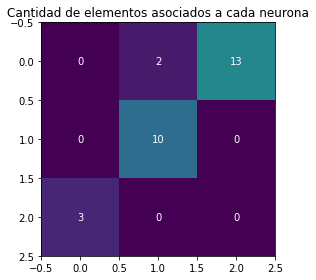

Distancia promedio entre neuronas vecinas (iter final): 3.0709651263652837


In [61]:
from utils import init_weights, init_weights_from_data, get_winner_neuron, get_active_neurons, update_weights
import matplotlib.pyplot as plt

epochs = 100
data_count = len(df_stand.index)
max_t = epochs * data_count
t = 0

w = init_weights_from_data(k, n, df_stand, data_count)


#plotting array
points = np.array([[0 for i in range(k)] for j in range(k)])


for e in range(epochs):
    points = [[0 for i in range(k)] for j in range(k)]
    
    for p in range(data_count):
        #get sample from data
        x_p = df_stand.iloc[[p]][["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].to_numpy()

        #find winner neuron
        closest_info = get_winner_neuron(w, x_p, k)

        points[closest_info['x']][ closest_info['y']] += 1

        #neuronas activadas
        N_k = get_active_neurons(w, k, closest_info['x'], closest_info['y'], radius)

        #actualizar pesos
        w = update_weights(w, x_p, N_k, learning_rate)

        #update radius and learning_rate
        radius = np.floor((max_t - t*1.2) * radius/max_t) + 1
        learning_rate = 1 / (t+1)
        t += 1

#plotting the final heatmap...
fig, ax = plt.subplots()
im = ax.imshow(points, vmin=0, vmax=28)
# Loop over data dimensions and create text annotations.
for i in range(k):
    for j in range(k):
        if points[i][j] <= 20: 
            text = ax.text(j, i, points[i][j], ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, points[i][j], ha="center", va="center", color="b")

ax.set_title("Cantidad de elementos asociados a cada neurona")
fig.tight_layout()
plt.show()


#calculate avg neighbors distance for final iter...
print("Distancia promedio entre neuronas vecinas (iter final):", get_avg_distance(w))
